In [17]:
import numpy as np
from math import sqrt
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from scipy.stats import norm
from scipy.stats import lognorm
import seaborn as sns
sns.set()
import sobol_seq
sns.set_style('white')
from scipy.spatial import distance

In [18]:
# load file, skip header, load angles and coordinates, also grain ID
coords=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(3,4))
grain_IDs=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(8))
coords_and_grains=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(3,4,8))
coords_and_grains_copy=np.copy(coords_and_grains)

Text(0, 0.5, 'Probability Density')

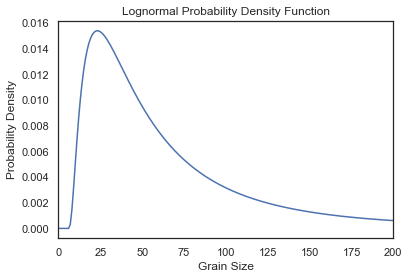

In [19]:
#use all the rows to make a lognorm pdf
uniquegrains=np.unique(grain_IDs,return_counts=True)
ID, count = uniquegrains
probability_vector=count/(np.sum(count))
#print(mean(count))
#normalize, divide all grains by total number of grains
# norm_count=count/(len(count))
# print(mean(norm_count))
#grains = dict(zip(ID, count)) 
params = lognorm.fit(count)
xvals = np.linspace(0, 250, num=250)
pdf = lambda x: lognorm.pdf(xvals, *params)
t = pdf(xvals)
#remove 0 values to prevent KL error
t[t==0]=[0.000001]
plt.xlim(0, 200)
plt.plot(xvals, t)
plt.title("Lognormal Probability Density Function")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')

In [5]:
print(count)

[29 52 47 ... 14 15 10]


Text(0, 0.5, 'Frequency')

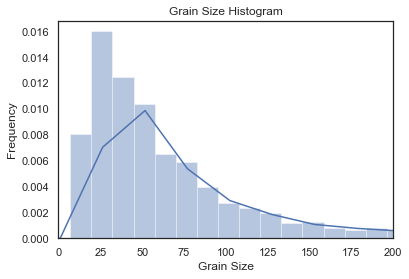

In [6]:
sns.distplot(count, hist=True, bins=250, kde=True)
plt.xlim(0, 200)
plt.title("Grain Size Histogram")
plt.xlabel('Grain Size')
plt.ylabel('Frequency')

In [7]:
# #random grain sampler
# random_count = np.random.choice(count, 1114, replace=False)
# #print(mean(random_count))
# params = lognorm.fit(random_count)
# xvals = np.linspace(0, 200, num=200)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# r = pdf(xvals)
# r[r==0]=[0.000001]
# plt.xlim(0, 200)
# plt.plot(xvals, r)

In [8]:
new_array=[]
for x in range (0,90000,10000):
    new_array.append(x)

In [9]:
print(new_array)
print(new_array[2])

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
20000


In [10]:
#random pixel histogram
random_grain_IDs=np.random.choice(grain_IDs, sample, replace=False)
random_unique_grains=np.unique(random_grain_IDs,return_counts=True)
random_ID, random_count = random_unique_grains
#print(random_count)
scale=(int(len(grain_IDs)))/(sample)
#print(scale)
scaled_random_count=scale*random_count
#print(scaled_random_count)
sns.distplot(scaled_random_count, hist=True, bins=250, kde=True, color='red')
plt.xlim(0, 200)
plt.title("Grain Size Histogram")
plt.xlabel('Grain Size')
plt.ylabel('Frequency')
#grains get smaller!, in window sampling they do not

NameError: name 'sample' is not defined

In [43]:
def random(sample):
    #random_count = np.random.choice(count, sample, replace=False)
    random_grain_IDs=np.random.choice(grain_IDs,sample, replace=False)
    random_unique_grains=np.unique(random_grain_IDs,return_counts=True)
    random_ID, random_count = random_unique_grains
    scale=(int(len(grain_IDs)))/(sample)
    scaled_random_count=scale*random_count
    params = lognorm.fit(scaled_random_count)
    xvals = np.linspace(0, 250, num=250)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    r = pdf(xvals)
    r[r==0]=[0.000001]
    return r

In [21]:
def random_mean(numSamples, numTrials):
    random_trials=[]
    for i in range(numTrials):
         random_trials.append(random(numSamples))
    mean=sum(random_trials)/len(random_trials)
    return mean

# xvals = np.linspace(0, 200, num=200)
# plt.plot(xvals,random_mean(40000, 1))

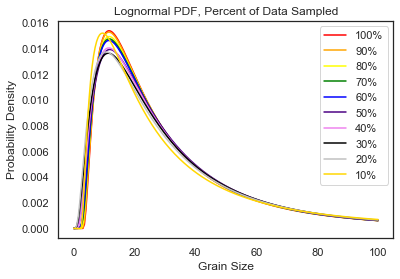

In [13]:
xvals = np.linspace(0, 100, num=200)
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Percent of Data Sampled")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
plt.plot(xvals, random_mean(len(grain_IDs),10), color='red', label='100%')
plt.plot(xvals, random_mean(78315,10), color='orange', label='90%')
plt.plot(xvals, random_mean(69613,10), color='yellow', label='80%')
plt.plot(xvals, random_mean(60911,10), color='green', label='70%')
plt.plot(xvals, random_mean(52210,10), color='blue', label='60%')
plt.plot(xvals, random_mean(43508,10), color='indigo', label='50%')
plt.plot(xvals, random_mean(34806,10), color='violet', label='40%')
plt.plot(xvals, random_mean(26105,10), color='black', label='30%')
plt.plot(xvals, random_mean(17403,10), color='silver', label='20%')
plt.plot(xvals, random_mean(8701,10), color='gold', label='10%')
leg = ax.legend()

In [22]:
def grid(res):
    #we're using grains not rows!
    #grid_count=count[::res]
    #norm_grain_grid=(grain_grid)/(len(grain_grid))
    # uniquegrains=np.unique(grain_grid,return_counts=True)
    # ID, count = uniquegrains
    #print(mean(grid_count))
    grid_grain_IDs=grain_IDs[::res]
    grid_unique_grains=np.unique(grid_grain_IDs,return_counts=True)
    grid_ID, grid_count = grid_unique_grains
    scale=(int(len(grain_IDs)))/(int(len(grid_grain_IDs)))
    scaled_grid_count=scale*grid_count
    params = lognorm.fit(scaled_grid_count)
    xvals = np.linspace(0, 250, num=250)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    g = pdf(xvals)
    g[g==0]=[0.000001]
    return g   

In [23]:
def grid_mean(res, numTrials):
    random_trials=[]
    start=0
    for i in range(numTrials):
        random_trials.append(grid(res))
        start+=1
    mean=sum(random_trials)/len(random_trials)
    return mean

In [8]:
# ww=[]

# for i in range(1,11,1):
#     ww.append(((87017/i)/87017)*100)
    
# print(ww)

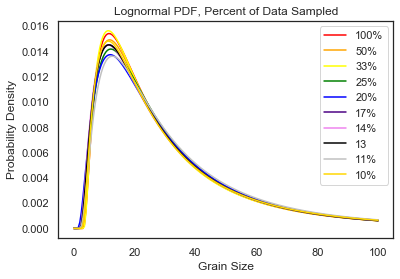

In [9]:
xvals = np.linspace(0, 100, num=200)
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Percent of Data Sampled")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
plt.plot(xvals, grid_mean(1,10), color='red', label='100%')
plt.plot(xvals, grid_mean(2,10), color='orange', label='50%')
plt.plot(xvals, grid_mean(3,10), color='yellow', label='33%')
plt.plot(xvals, grid_mean(4,10), color='green', label='25%')
plt.plot(xvals, grid_mean(5,10), color='blue', label='20%')
plt.plot(xvals, grid_mean(6,10), color='indigo', label='17%')
plt.plot(xvals, grid_mean(7,10), color='violet', label='14%')
plt.plot(xvals, grid_mean(8,10), color='black', label='13')
plt.plot(xvals, grid_mean(9,10), color='silver', label='11%')
plt.plot(xvals, grid_mean(10,10), color='gold', label='10%')
leg = ax.legend()

In [40]:
def fine_grid(res):
    #we're using grains not rows!
    #grid_count=count[::res]
    #norm_grain_grid=(grain_grid)/(len(grain_grid))
    # uniquegrains=np.unique(grain_grid,return_counts=True)
    # ID, count = uniquegrains
    #print(mean(grid_count))
    #grid_grain_IDs=grain_IDs[::res]
    #res=len(grain_IDs)-res
    grid_grain_IDs=np.delete(grain_IDs, np.arange(0, grain_IDs.size, res))
    grid_unique_grains=np.unique(grid_grain_IDs,return_counts=True)
    grid_ID, grid_count = grid_unique_grains
    scale=(int(len(grain_IDs)))/(int(len(grid_grain_IDs)))
    scaled_grid_count=scale*grid_count
    params = lognorm.fit(scaled_grid_count)
    xvals = np.linspace(0, 250, num=250)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    g = pdf(xvals)
    g[g==0]=[0.000001]
    return g   

In [41]:
def fine_grid_mean(res, numTrials):
    random_trials=[]
    start=0
    for i in range(numTrials):
        random_trials.append(fine_grid(res))
        start+=1
    mean=sum(random_trials)/len(random_trials)
    return mean

In [42]:
www=[]

for i in range(2,12,1):
    www.append(((87017-(87017/i))/87017)*100)
    
print(www)

[50.0, 66.66666666666666, 75.0, 80.0, 83.33333333333334, 85.71428571428571, 87.5, 88.88888888888889, 90.0, 90.9090909090909]


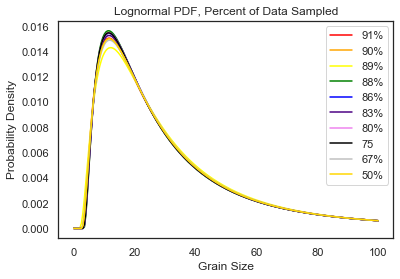

In [22]:
xvals = np.linspace(0, 100, num=200)
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Percent of Data Sampled")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
plt.plot(xvals, fine_grid_mean(11,10), color='red', label='91%')
plt.plot(xvals, fine_grid_mean(10,10), color='orange', label='90%')
plt.plot(xvals, fine_grid_mean(9,10), color='yellow', label='89%')
plt.plot(xvals, fine_grid_mean(8,10), color='green', label='88%')
plt.plot(xvals, fine_grid_mean(7,10), color='blue', label='86%')
plt.plot(xvals, fine_grid_mean(6,10), color='indigo', label='83%')
plt.plot(xvals, fine_grid_mean(5,10), color='violet', label='80%')
plt.plot(xvals, fine_grid_mean(4,10), color='black', label='75')
plt.plot(xvals, fine_grid_mean(3,10), color='silver', label='67%')
plt.plot(xvals, fine_grid_mean(2,10), color='gold', label='50%')
leg = ax.legend()

In [27]:
#only works with ideal distributions where q is also not zero
#shouldn't need to use != p, since probability is not zero, try log space or cut function when it is around zero?
#does divergence need to be averaged?, no since it does not have randomness
def kl_divergence(p, q):
    # return np.sum(np.where((q != 0) | (p != 0), p * np.log(p / q), 0))
    return np.sum(np.where((q != 0), p * np.log2(p / q), 0))

In [28]:
#Jensen-Shannon: smoothed and normalized?! between 0 and 1
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [16]:
# def kl_divergence(p, q, numTrials):
#     kl_divergences=[]
#     for i in range(numTrials):
#          kl_divergences.append(np.sum(np.where((q != 0), p * np.log2(p / q), 0)))
#     mean=sum(kl_divergences)/len(kl_divergences)
#     return mean

In [17]:
# def js_divergence(p, q, numTrials):
#     m = 0.5 * (p + q)
#     return 0.5 * kl_divergence(p, m, numTrials) + 0.5 * kl_divergence(q, m, numTrials)

In [18]:
# a=[]
# b=[]
# for i in range(1,1000):
#     a.append(i)
#     b.append(js_divergence(t,grid(i),100))

In [19]:
# xvals = np.linspace(0, 200, num=200)
# plt.plot(xvals, grid(1000))

In [20]:
# #use data
# xvals = np.linspace(0, 200, num=200)
# plt.title('KL(P||Q) = %1.3f' % js_divergence(t, g))
# plt.plot(xvals, t)
# plt.plot(xvals, g, c='red')

In [21]:
# sns.set_style('darkgrid')
# plt.xlim(0, 100)
# sns.scatterplot(a,b)
# #note: 80000/1000=80

In [46]:
#x axis as percent
cc=[]

for i in range (1,85000,100):
    cc.append((i/85000)*100)

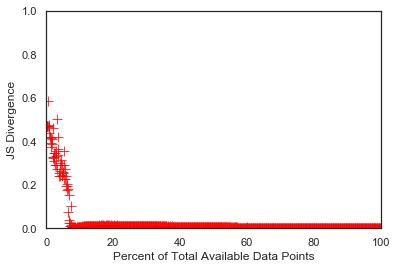

In [34]:
plt.xlim(0, 100)
plt.ylim(0, 1)
#plt.title('JS Divergence of Dataset and Randomly Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
sns.scatterplot(cc, bb, s=100, color="red", marker="+")

In [35]:
# a=[]
# b=[]
# for i in range(1,85000,100):
#     a.append(i)
#     b.append(js_divergence(t,grid_mean(i,10)))

In [36]:
# #change resolution to number of samples
# c=[87017]*len(a)
# d=[x/y for x,y in zip(c, a)]

In [45]:
aa=[]
bb=[]

for i in range(1,85000,100):
    aa.append(i)
    bb.append(js_divergence(t,random_mean(i,10)))

In [47]:
xx=[]
yy=[]
zz=[]
#past 50, values go out of range and oscillate
for i in range(1,50,1):
    xx.append(i)
    yy.append(js_divergence(t,grid_mean(i,10)))
    zz.append(87017/i)

In [48]:
ww=[]

for i in range(1,50,1):
    ww.append(((87017/i)/87017)*100)

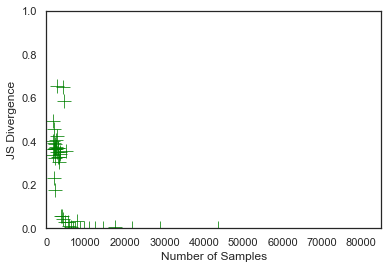

In [39]:
plt.xlim(0, 85000)
plt.ylim(0, 1)
#plt.title('JS Divergence of Dataset and Grid Sampled Subset')
plt.xlabel('Number of Samples')
plt.ylabel('JS Divergence')
sns.scatterplot(zz, yy, s=200, color="green", marker="+")
#note: 80000/1000=80

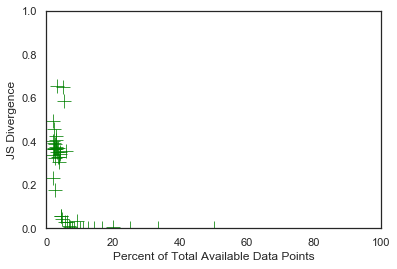

In [40]:
plt.xlim(0, 100)
plt.ylim(0, 1)
#plt.title('JS Divergence of Dataset and Grid Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
sns.scatterplot(ww, yy, s=200, color="green", marker="+")
#note: 80000/1000=80

In [49]:
xxx=[]
yyy=[]
zzz=[]
for i in range(2,100,1):
    xxx.append(i)
    yyy.append(js_divergence(t,fine_grid_mean(i,10)))
    zzz.append(87017-(87017/i))

In [53]:
print(len(yyy))

98


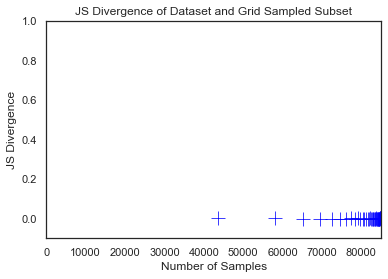

In [42]:
plt.xlim(0, 85000)
plt.ylim(-0.1, 1)
plt.title('JS Divergence of Dataset and Grid Sampled Subset')
plt.xlabel('Number of Samples')
plt.ylabel('JS Divergence')
sns.scatterplot(zzz, yyy, s=200, color="blue", marker="+")

In [55]:
www=[]

for i in range(2,100,1):
    www.append(((87017-(87017/i))/87017)*100)

In [56]:
print(len(www))

98


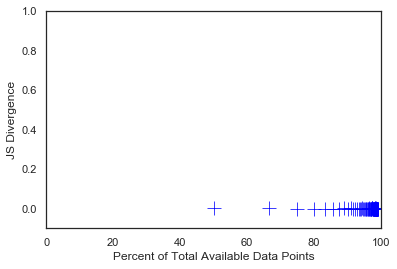

In [44]:
plt.xlim(0, 100)
plt.ylim(-0.1, 1)
#plt.title('JS Divergence of Dataset and Grid Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
sns.scatterplot(www, yyy, s=200, color="blue", marker="+")

In [ ]:
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    grains_slice=coords_and_grains_slice[:,2]
    uniquegrains=np.unique(grains_slice,return_counts=True)
    IDs, count = uniquegrains
    
#     #create array to hold grain IDs and edge column
#     edges=np.zeros((len(coords_and_grains_slice),1))
#     coords_and_grain_slice_with_edges=np.concatenate((coords_and_grains_slice,edges.reshape(-1,1)),axis=1)
    
#     #min x
#     left_edge=np.amin(coords_and_grains_slice[:,0])
#     #max x
#     right_edge=np.amax(coords_and_grains_slice[:,0])
#     #min y
#     bottom_edge=np.amin(coords_and_grains_slice[:,1])
#     #max y
#     top_edge=np.amax(coords_and_grains_slice[:,1])
#     #assign edge grains
#     for row in coords_and_grain_slice_with_edges:
#         #x values
#         if row[0] <= left_edge or row[0] >= right_edge:
#             #it's an edge
#             row[3]=1
#         #y values
#         if row[1] <= bottom_edge or row[1] >= top_edge:
#             #it's an edge
#             row[3]=1
            
#     #plot showing edges
# #     sns.scatterplot(x=coords_and_grain_slice_with_edges[:,0],y=coords_and_grain_slice_with_edges[:,1],marker='o',hue=coords_and_grain_slice_with_edges[:,3])
            
#     #slice array for edge calculation
#     grain_slice_and_edges=coords_and_grain_slice_with_edges[:,2:4]
    
#     #double window edge grains
#     for ID in IDs:
#     #all rows with the ID
#         ID_rows=grain_slice_and_edges[np.where(grain_slice_and_edges[:,0] == ID)]
#         #search for one in edge column
#         for row in ID_rows:
#             #if it's an edge
#             if row[1]==1:
#                 #double count in the same index as the edge ID
#                 ind=np.where(IDs == ID)
#                 count[int(ind[0])]*=2
#                 #only double once
#                 break
#             else:
#                 continue
    
    #fit pdf
    params = lognorm.fit(count)
    xvals = np.linspace(0, 250, num=250)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    return s

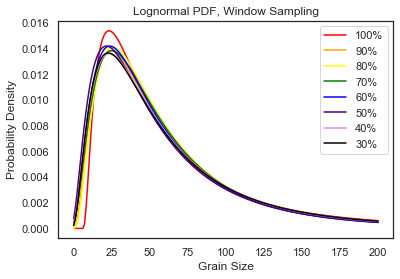

In [98]:
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Window Sampling")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
xvals = np.linspace(0, 200, num=200)
plt.plot(xvals, grain_square(100), color='red', label='100%')
plt.plot(xvals, grain_square(90), color='orange', label='90%')
plt.plot(xvals, grain_square(80), color='yellow', label='80%')
plt.plot(xvals, grain_square(70), color='green', label='70%')
plt.plot(xvals, grain_square(60), color='blue', label='60%')
plt.plot(xvals, grain_square(50), color='indigo', label='50%')
plt.plot(xvals, grain_square(40), color='violet', label='40%')
plt.plot(xvals, grain_square(30), color='black', label='30%')
#plt.plot(xvals, grain_square(20), color='silver', label='20%')
leg = ax.legend()

In [38]:
x4=[]
y4=[]
for percent in range(2,100,1):
    x4.append(percent)
    y4.append(js_divergence(t,grain_square(sqrt(percent*100))))

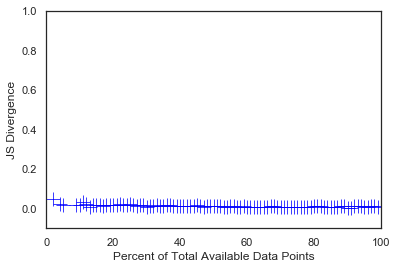

In [100]:
plt.xlim(0, 100)
plt.ylim(-0.1, 1)
#plt.title('JS Divergence of Dataset and Window Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
sns.scatterplot(x4, y4, s=200, color="blue", marker="+")

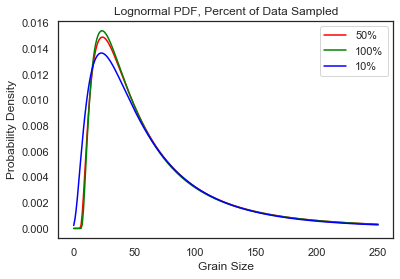

In [15]:
xvals = np.linspace(0, 250, num=250)
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Percent of Data Sampled")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
plt.plot(xvals, grid_mean(2,10), color='red', label='50%')
plt.plot(xvals, t, color='green', label='100%')
plt.plot(xvals, grain_square(30), color='blue', label='10%')
leg = ax.legend()

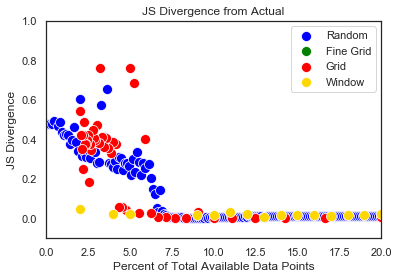

In [59]:
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.ylim(-0.1, 1)
#plt.title('JS Divergence of Dataset and Grid Sampled Subset')
plt.title('JS Divergence from Actual')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
sns.scatterplot(cc, bb, s=100, color="blue", marker="o", label='Random')
sns.scatterplot(www, yyy, s=100, color="green", marker="o", label='Fine Grid')
sns.scatterplot(ww, yy, s=100, color="red", marker="o", label='Grid')
sns.scatterplot(x4, y4, s=100, color="gold", marker="o", label='Window')

In [1]:
x4=[]
y4=[]
for percent in range(0,100):
    x4.append(percent)
    y4.append(js_divergence(t,grain_square((percent/100))))

NameError: name 'js_divergence' is not defined

In [44]:
def grain_square(percent):
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 250, num=250)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    return s

NameError: name 'coords_and_grains_copy' is not defined

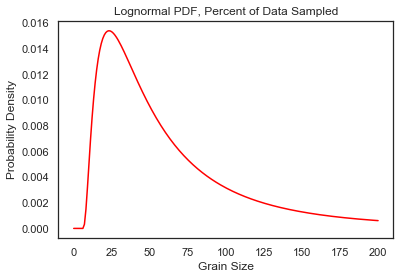

In [58]:
xvals = np.linspace(0, 200, num=200)
fig, ax = plt.subplots()
plt.title("Lognormal PDF, Percent of Data Sampled")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')
plt.plot(xvals, t, color='red', label='Total')
plt.plot(xvals, grain_square(1), color='blue', label='100%')
leg = ax.legend()

In [33]:
N=5000
#the image is roughtly 295x295 pix
sobol = 110*(sobol_seq.i4_sobol_generate(2, N))
# print(sqrt(87034-18))


In [42]:
# plt.title("Sobol Grid")
# plt.scatter(sobol[:,0], sobol[:,1], marker=".", alpha=0.5);

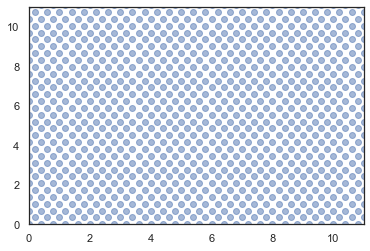

In [52]:
xcoords=coords[0:,0]
ycoords=coords[0:,1]
plt.xlim(0,11)
plt.ylim(0,11)
plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [213]:
coords_and_grains_copy=np.copy(coords_and_grains)

In [246]:
#plt.scatter(coords_and_grains_slice[:,0], coords_and_grains_slice[:,1], marker="o", alpha=0.5)   

In [234]:
# index=0
# row_0=coords_and_grains_copy[0]
# print(row0)
# row_1=coords_and_grains_copy[1]
# print(row1)
# coords_and_grains_slice=np.vstack((row0,row1))
# print(coords_and_grains_slice)

In [247]:
# row_list=[]
# row_list.append(row_0)
# row_list.append(row_1)
# print(row_list)

In [248]:
# row_tuple=tuple(row_list)
# coords_and_grains_slice=np.vstack(row_tuple)
# print(coords_and_grains_slice)
# print(coords_and_grains_slice[:,2])

In [148]:
#coords_and_grains_slice = np.delete(coords_and_grains_copy, np.where((coords_and_grains_copy[index,0]>=int((110*0.1))) and (coords_and_grains_copy[index,1]>=int((110*0.1)))))
#print(coords_and_grains_slice)

In [180]:
# for index in range(0,len(coords_and_grains)):
#     if (coords_and_grains_copy[index,0]<=int((110*0.1))) and (coords_and_grains_copy[index,1]<=int((110*0.1))):
#         continue
#     else:
#         coords_and_grains_copy=np.delete(coords_and_grains_copy, (index), axis=0)

In [157]:
# print(coords_and_grains_copy)
# coords_and_grains_copy=np.delete(coords_and_grains_copy, (0), 0)
# print(coords_and_grains_copy)
# #coords_and_grains_xslice, coords_and_grains_yslice, coords_and_grains_grainslice = coords_and_grains_copy

In [189]:
#coords_and_grains_slice=np.array([])

In [198]:
# print(coords_and_grains_copy[1])
# coords_and_grains_slice=np.append(coords_and_grains_slice,coords_and_grains_copy[0],axis=0)
# print(coords_and_grains_slice)

In [219]:
# #coords_and_grains_slice = np.empty(shape=(0, 3))
# coords_and_grains_slice=np.array([])
# print(coords_and_grains_slice)

In [220]:
# index=0
# # new_row=coords_and_grains_copy[index]
# print(new_row)
# # new_row.reshape((-1, 3))
# # print(new_row)

In [221]:
# coords_and_grains_slice=np.append(coords_and_grains_slice,new_row,axis=0)
# print(coords_and_grains_slice)

In [222]:
# coords_and_grains_slice=np.vstack((coords_and_grains_slice,new_row))
# print(coords_and_grains_slice)

In [197]:
#plt.scatter(coords_and_grains_xslice, coords_and_grains_yslice, marker="o", alpha=0.5)   

In [ ]:
# coords_and_grains_xslice=np.array([])
# coords_and_grains_yslice=np.array([])
# x_index=0
# y_index=0
# for xcoord in coords_and_grains[:,0]:
#     if xcoord <= int((110*0.1)):
#         np.concatenate(coords_and_grains_xslice,coords_and_grains[x_index])
#         #coords_and_grains_xslice.append(coords_and_grains[x_index],axis=0)
#         #np.append(coords_and_grains_xslice,coords_and_grains[x_index], axis=0)
#         #coords_and_grains_xslice.append(coords_and_grains[x_index])
#     x_index+=1  

# print(coords_and_grains_xslice)
# # print(coords_and_grains_xslice)
# # print(coords_and_grains_xslice[:,0])

# # for ycoord in coords_and_grains_xslice[:,1]:
# #     if ycoord <= int((110*0.1)):
# #         coords_and_grains_yslice.append(coords_and_grains_xslice[y_index]) 
# #     y_index+=1
        
# # print(coords_and_grains_yslice)

In [ ]:
# #bundle coordiantes and grain IDs, return rows with x range, narrow by y range, extract grain IDs from 3rd column

# def square_sample(percent):
#     coords_and_grains_slice=[]
#     x_index=0
#     for xcoord in coords_and_grains[:,0]:
#         if xcoord <= int((110*percent)):
#             coords_and_grains_slice.append(coords_and_grains[x_index])
#         x_index+=1

# #     for ycoord in coords_and_grains[:,1]:
# #         if coord <= int((110*percent)):
# #             ycoords_slice.append(coord)     

# #     #the lines are not a grid, therefore they are sliced to give the array the same length 
# #     if len(xcoords_slice) <= len(ycoords_slice):
# #         min_len=len(xcoords_slice)
# #     else:
# #         min_len=len(ycoords_slice) 

#     return coords_and_grains_slice[:,2]
# #     plt.scatter(xcoords_slice[:min_len], ycoords_slice[:min_len], marker="o", alpha=0.5)      
    
# square_sample(0.1)
# # square_sample(side_lens[9])

In [75]:
#keep all together, returns rows with condition, narrow by y, extract grain IDs from 3rd column

def square_sample(percent):
    xcoords_slice=[]
    for coord in xcoords:
        # print(xcoords.size)
        if coord <= int((110*percent)):
            xcoords_slice.append(coord)

    ycoords_slice=[]
    for coord in ycoords:
        # print(ycoords.size)
        if coord <= int((110*percent)):
            ycoords_slice.append(coord)     

    #the lines are not a grid, therefore they are sliced to give the array the same length 
    if len(xcoords_slice) <= len(ycoords_slice):
        min_len=len(xcoords_slice)
    else:
        min_len=len(ycoords_slice) 

    return zip(xcoords_slice[:min_len], ycoords_slice[:min_len])
#     plt.scatter(xcoords_slice[:min_len], ycoords_slice[:min_len], marker="o", alpha=0.5)      
    
# square_sample(side_lens[9])

In [ ]:
# side_lens=[]
# for x in range (1,11,1):
#     side_lens.append(sqrt(x/10))
# print(side_lens)
# percent_10=square_sample(side_lens[])
# percent_20=square_sample(percent)
# percent_30=square_sample(percent)
# percent_40=square_sample(percent)
# percent_50=square_sample(percent)
# percent_60=square_sample(percent)
# percent_70=square_sample(percent)
# percent_80=square_sample(percent)
# percent_90=square_sample(percent)
# percent_100=square_sample(percent)

In [24]:
# print(xcoords.size)
# print(ycoords.size)
row_length=0
# for 
#0:275, 0.34641:274, 8.31384:275, 109.46561:275
for y in ycoords:
    if(y==109.46561):
        row_length+=1
print(row_length)
# print(sqrt(87017))

275


In [32]:
print(sqrt(87017))
print(275**2)

294.9864403663328
75625


In [ ]:
row_length=0
# for 
#0:275, 0.34641:274, 8.31384:275, 109.46561:275
for x in xcoords:
    if(y==109.46561):
        row_length+=1
print(row_length)

In [33]:
print(109.6/0.4)

273.99999999999994


In [27]:
# g=[87017]*len(xx)
# h=[x/y for x,y in zip(g, a)]
# for value in yy:
#     if y>1:
#         yy.pop(value)
# print(yy)

In [38]:
# sns.set_style('darkgrid')
# # plt.xlim(0, 85000)
# plt.ylim(0, 1)
# plt.title('JS Divergence of Dataset and Grid Sampled Subset')
# plt.xlabel('Number of Samples')
# plt.ylabel('JS Divergence')
# sns.scatterplot(aa, b, s=100, color=".2", marker="+")
# #note: 80000/1000=80

In [39]:
# aaa=[]
# bbb=[]
# for i in range(1,85000,100):
#     aaa.append(i)
#     bbb.append(js_divergence(t,grid_mean(i,10)))

In [40]:
# sns.set_style('darkgrid')
# plt.xlim(0, 85000)
# plt.ylim(0, 1)
# plt.title('JS Divergence of Dataset and Grid Sampled Subset')
# plt.xlabel('Grid Resolution')
# plt.ylabel('JS Divergence')
# sns.scatterplot(aaa, bbb, s=100, color=".2", marker="+")
# #note: 80000/1000=80

In [41]:
aaaa=[]
bbbb=[]
#can't start at one, deletes to create empty array
for i in range(2,85000,100):
    aaaa.append(i)
    bbbb.append(js_divergence(t,fine_grid_mean(i,10)))

In [42]:
e=[87017]*len(aaaa)
f=[x/y for x,y in zip(e, aaaa)]

In [43]:
# sns.set_style('darkgrid')
# # plt.xlim(0, 85000)
# # plt.ylim(0, 1)
# plt.title('JS Divergence of Dataset and Fine Grid Sampled Subset')
# plt.xlabel('Fine Grid Resolution')
# plt.ylabel('JS Divergence')
# sns.scatterplot(f, bbbb, s=100, color=".2", marker="+")
# #note: 80000/1000=80

In [44]:
# a.append(aa)
# a.append(aaaa)
# b.append(bb)
# b.append(bbbb)
# sns.set_style('darkgrid')
# plt.xlim(0, 85000)
# plt.ylim(0, 1)
# plt.title('JS Divergence of Dataset and  Sampled Subset')
# plt.xlabel('Fine Grid Resolution')
# plt.ylabel('JS Divergence')
# sns.scatterplot(a, b, s=100, color=".2", marker="+")

In [45]:
# # histogram of count with kde & height normalization -> probability?
# sns.set_style('darkgrid')
# # seaborn.displot(count, x="Grain Size", stat="probability"), need to update seaborn
# sns.distplot(count, hist=True, bins=250, kde=True)
# plt.xlim(0, 200)
# #print(mean(count))

In [46]:
# #grid sampler
# #when res=1, it is identical to the entirety of count
# res=1
# grid_count=count[::res]
# #norm_grain_grid=(grain_grid)/(len(grain_grid))
# # uniquegrains=np.unique(grain_grid,return_counts=True)
# # ID, count = uniquegrains
# #print(mean(grid_count))
# params = lognorm.fit(grid_count)
# xvals = np.linspace(0, 200, num=200)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# g = pdf(xvals)
# g[g==0]=[0.000001]
# plt.xlim(0, 200)
# plt.plot(xvals, g)
# #mean shifts, but does that matter for a pdf?

In [47]:
# aa=[]
# bb=[]

# for i in range(1,40000,100):
#     aa.append(i)
#     bb.append(js_divergence(t,random_mean(i,10)))

In [48]:
# a=[]
# b=[]
# for i in range(1,80000,100):
#     a.append(i)
#     b.append(js_divergence(t,grid_mean(i,10)))

In [49]:
# sns.set_style('darkgrid')
# plt.xlim(0, 100)
# sns.scatterplot(aa,bb)

In [50]:
# sns.set_style('darkgrid')
# plt.xlim(0, 100)
# sns.scatterplot(a,b)

In [51]:
#implement grid shift and random, random trials

In [52]:
# # test distributions
# x = np.arange(-10, 10, 0.001)
# y = norm.pdf(x, 0, 2)
# z = norm.pdf(x, 5, 4)

In [53]:
# plt.title('KL(P||Q) = %1.3f' % kl_divergence(z, y))
# plt.plot(x, y)
# plt.plot(x, z, c='red')

In [54]:
# plt.title('JS(P||Q) = %1.3f' % js_divergence(y, z))
# plt.plot(x, y)
# plt.plot(x, z, c='red')

In [55]:
# plt.title('KL(P||Q) = %1.3f' % js_divergence(z, y))
# plt.plot(x, y)
# plt.plot(x, z, c='red')

In [56]:
# kl_divergence(t,grid(80000))

In [57]:
# #the functions are working, as they have a kld of 0 when using all points
# kl_divergence(random(len(count)),grid(1))
# #divide by zero error, due to underflow in scipy lognorm...use lognorm.logpdf instead and work in log space?!

In [58]:
# plt.title('KL(P||Q) = %1.3f' % kl_divergence(y, z))
# plt.plot(x, y)
# plt.plot(x, z, c='red')

In [59]:
# #based on grid, normalized?
# uniquegrains=np.unique(norm_grain_grid,return_counts=True)
# ID, count = uniquegrains
# print(mean(count))
# params = lognorm.fit(count)
# xvals = np.linspace(0, 20)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# q = pdf(xvals)
# plt.plot(xvals, q)

In [60]:
# #random_grain_IDs.shape
# randomuniquegrains=np.unique(random_grain_IDs,return_counts=True)
# randID, randcount = randomuniquegrains
# randgrains = dict(zip(randID, randcount)) 

In [61]:
#normalize by height, since more grains means bigger bins

In [62]:
# # count.flatten()
# # randcount.flatten()
# p=norm.pdf(count)
# q=norm.pdf(randcount)
# #plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
# plt.xlim(0, 20)
# plt.plot(count, p)
# plt.plot(randcount, q, c='red')

In [63]:
# #slice into smaller pieces for lower resolution
# #print(coords.shape)
# xvals=coords[:,0]
# xslice=xvals[70000:80000:1]
# #maxx
# yvals=coords[:,1]
# yslice=yvals[70000:80000:1]
# #maxy
# #set bounds
# plt.plot(xslice,yslice)
# #the data is arranged by lines, i.e. a raster scan 
# #not by grain, therefore sampling by grid is easy

In [64]:
# # old stuff
# from scipy.stats import lognorm
# params = lognorm.fit(count)
# xvals = np.linspace(0, 20)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# p = np.where(pdf !=0 ,pdf(xvals), 0.0001)
# print(p)
# plt.plot(xvals, p)

In [65]:
# random_grain_IDs=grain_IDs[np.random.choice(grain_IDs.shape[0], 10000, replace=False)]
# total=len(coords)

In [66]:
#p
# from scipy.stats import lognorm
# params = lognorm.fit(count)
# xvals = np.linspace(0, 20)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# p = pdf(xvals)
# plt.plot(xvals, p)

In [67]:
# #old randcount function
# params = lognorm.fit(randcount)
# xvals = np.linspace(0, 20)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# q = pdf(xvals)
# plt.plot(xvals, q)

In [346]:
# print(kl_divergence(p, q))
#divide by zero error, but uses numpy.where! check out documentation, focus on sampling

In [347]:
#same random sampling as algorithm, needs normalization, made from random sample of 10000
# seaborn.set_style('darkgrid')
# plt.xlim(0, 20)
# seaborn.distplot(randcount, bins=100)


In [183]:
#distribution of randomly selected grain sizes
# seaborn.set_style('darkgrid')
# random_counts = np.random.choice(count, 100, replace=False)
# plt.xlim(0, 500)
# seaborn.distplot(random_counts)
# print(mean(random_counts))

In [188]:
# count.flatten()
# randcount.flatten()
# print(count.shape)
# print(randcount.shape)

In [181]:
# plt.scatter(random_IDs, random_counts)

In [180]:
# fig, ax = plt.subplots(tight_layout=True)
# random_IDs = np.random.choice(ID, 20, replace=False)
# random_counts = np.random.choice(ID, 20, replace=False)
# hist = ax.hist2d(random_IDs, random_counts, bins=25)

In [182]:
#distribution of grain sizes
# seaborn.set_style('darkgrid')
# plt.xlim(0, 500)
# seaborn.distplot(count)
# from statistics import mean
# print(mean(count))

In [179]:
# plt.scatter(ID, count);
# #why does some bins have so many?

In [178]:
#fig, ax = plt.subplots(tight_layout=True)
#hist = ax.hist2d(ID, count, bins=25)